<a href="https://colab.research.google.com/github/firesinger/oceanography/blob/main/tide_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tide Analysis Program
composed by SUNG HOON RYU

Fist composed date : 2021.07.11

Email : firesinger@hey.com

1. Set initial Development Environment

2. Data Mining

3. Exploratory Data Analysis(EDA)

4. Visualization

5. Analysis and report

# 1. Set initial Development Environment
 
Connect to Google Drive

In [ ]:
import os, sys
from google.colab import drive
drive.mount('/content/drive')

# Set package path, revise path case by project
my_path = '/content/drive/MyDrive/additional_package'
import sys
sys.path.insert(0, '/content/drive/MyDrive/additional_package')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Install package to use conda environment

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:33
🔁 Restarting kernel...


In [ ]:
import condacolab
condacolab.check()

✨🍰✨ Everything looks OK!


Load pre-installed packages in environment.yml

In [ ]:
# install Utide package
! conda install utide -c conda-forge
#! conda env create -f '/content/drive/MyDrive/Colab Notebooks/Oceanography/tide/env/environment.yml'

Solving environment: / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - utide


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2021.5.30  |       ha878542_0         136 KB  conda-forge
    certifi-2021.5.30          |   py37h89c1867_0         141 KB  conda-forge
    conda-4.10.3               |   py37h89c1867_0         3.1 MB  conda-forge
    libblas-3.9.0              |       9_openblas          11 KB  conda-forge
    libcblas-3.9.0             |       9_openblas          11 KB  conda-forge
    libgfortran-ng-9.3.0       |      hff62375_19          22 KB  conda-forge
    libgfortran5-9.3.0         |      hff62375_19         2.0 MB  conda-forge
    liblapack-3.9.0            |       9_openblas          11 KB  conda-forge
    libopenbla

# 2. Data Mining

In [ ]:
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import utide

In [ ]:
from rpy2.robjects import r

In [ ]:
%load_ext rpy2.ipython

In [ ]:
## Fast reading csv file using fread()
%%R


In [ ]:

%%R -o df
df <- pd

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Oceanography/tide/data/busan.xlsx')

In [ ]:
df.head()

,1956,1,1.1,0,0.1,119
0,1956,1,1,1,0.0,80.0
1,1956,1,1,2,0.0,49.0
2,1956,1,1,3,0.0,37.0
3,1956,1,1,4,0.0,31.0
4,1956,1,1,5,0.0,40.0


In [ ]:
df.columns = ['year', 'month', 'day', 'hour', 'minute', 'elev']

In [ ]:
df.head()

,year,month,day,hour,minute,elev
0,1956,1,1,1,0.0,80.0
1,1956,1,1,2,0.0,49.0
2,1956,1,1,3,0.0,37.0
3,1956,1,1,4,0.0,31.0
4,1956,1,1,5,0.0,40.0


In [ ]:
del df['minute']

In [ ]:
df.head()

,year,month,day,hour,elev
0,1956,1,1,1,80.0
1,1956,1,1,2,49.0
2,1956,1,1,3,37.0
3,1956,1,1,4,31.0
4,1956,1,1,5,40.0


In [ ]:
df.isnull().sum()

year     2
month    2
day      2
hour     3
elev     3
dtype: int64

In [ ]:
df = df.dropna(how='any',axis=0) 

In [ ]:
df.isnull().sum()

year     0
month    0
day      0
hour     0
elev     0
dtype: int64

In [ ]:
df['anomaly'] = df['elev'] - df['elev'].mean()
df['anomaly'] = df['anomaly'].interpolate()

In [ ]:
df.head()

,year,month,day,hour,elev,anomaly
0,1956,1,1,1,80.0,10.214334
1,1956,1,1,2,49.0,-20.785666
2,1956,1,1,3,37.0,-32.785666
3,1956,1,1,4,31.0,-38.785666
4,1956,1,1,5,40.0,-29.785666


In [ ]:
def date_parser(year, month, day, hour):
    year, month, day, hour = map(int, (year, month, day, hour))
    return datetime.datetime(year, month, day, hour)

# Names of the columns that will be used to make a "datetime" column:
parse_dates = dict(datetime=['year', 'month', 'day','hour'])

# Names of the original columns in the file, including only
# the ones we will use; we are skipping the first, which appears
# to be seconds from the beginning.

In [ ]:
#(convert to R varialble to pyton)
%%R -o df
# Read csv file using data.table(fatest method)
library(data.table)
df <- fread("/content/drive/MyDrive/Colab Notebooks/Oceanography/tide/data/Busan.csv")

UsageError: Cell magic `%%R` not found.


In [ ]:
time = df.apply(pd.to_datetime, format="%Y-%m-%d-%H", errors='raise')

coef = utide.solve(time, df['anomaly'].values,
                   lat=35,
                   method='ols',
                   conf_int='MC')

ValueError: ignored

In [ ]:
(%%R
table(is.na(score))

# 3. Exploratory Data Analysis(EDA)

In [ ]:
obs['anomaly'] = obs['elev'] - obs['elev'].mean()
obs['anomaly'] = obs['anomaly'].interpolate()
print('{} points were flagged "bad" and interpolated'.format(bad.sum()))
print('{} points were flagged "corrected" and left unchanged'.format(corrected.sum()))

10 points were flagged "bad" and interpolated
212 points were flagged "corrected" and left unchanged


In [ ]:
time = mdates.date2num(obs.index.to_pydatetime())

coef = utide.solve(time, obs['anomaly'].values,
                   lat=-25,
                   method='ols',
                   conf_int='MC')

solve: matrix prep ... solution ... done.


In [ ]:
tide = utide.reconstruct(time, coef)

prep/calcs ... done.


In [ ]:
print(tide.keys())

dict_keys(['t_in', 'epoch', 'constit', 'min_SNR', 'min_PE', 't_mpl', 'h'])


# 4. Visualization

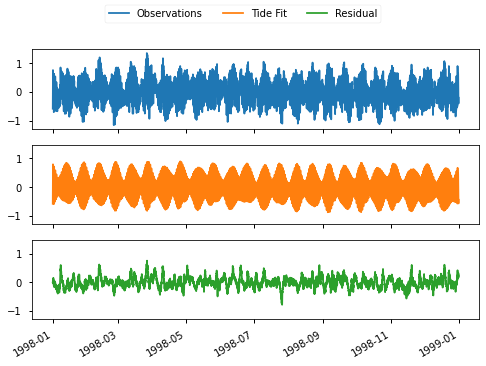

In [ ]:
#t = obs.index.values  # dtype is '<M8[ns]' (numpy datetime64)
# It is more efficient to supply the time directly as matplotlib
# datenum floats:
t = tide.t_mpl

fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, sharey=True, sharex=True)

ax0.plot(t, obs.anomaly, label=u'Observations', color='C0')
ax1.plot(t, tide.h, label=u'Tide Fit', color='C1')
ax2.plot(t, obs.anomaly - tide.h, label=u'Residual', color='C2')
ax2.xaxis_date()
fig.legend(ncol=3, loc='upper center')
fig.autofmt_xdate()

In [ ]:
def fake_tide(t, M2amp, M2phase):
    """
    Generate a minimally realistic-looking fake semidiurnal tide.
    
    t is time in hours
    phases are in radians
    
    Modified from: http://currents.soest.hawaii.edu/ocn760_4/_static/plotting.html
    """
    return M2amp * np.sin(2 * np.pi * t / 12.42 - M2phase)

In [ ]:
from pandas import date_range

N = 500

t = date_range(start='2016-03-29', periods=N, freq='H')

# Signal + some noise.
u = fake_tide(np.arange(N), M2amp=2, M2phase=0) + np.random.randn(N)
v = fake_tide(np.arange(N), M2amp=1, M2phase=np.pi) + np.random.randn(N)

In [ ]:
from matplotlib.dates import date2num

time = date2num(t.to_pydatetime())

In [ ]:
from utide import solve

coef = solve(time, u, v,
             lat=-42.5,
             nodal=False,
             trend=False,
             method='ols',
             conf_int='linear',
             Rayleigh_min=0.95,)

solve: matrix prep ... solution ... done.


In [ ]:
from utide import reconstruct

tide = reconstruct(time, coef)

prep/calcs ... done.


In [ ]:
tide.keys()

dict_keys(['t_in', 'epoch', 'constit', 'min_SNR', 'min_PE', 't_mpl', 'u', 'v'])

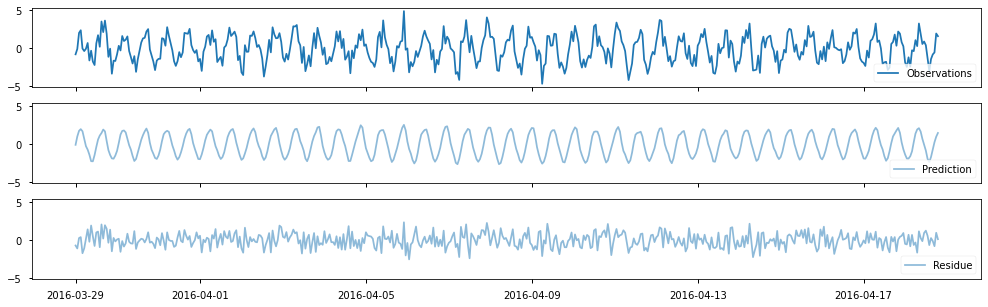

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('seaborn-notebook')

fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, sharey=True, sharex=True, figsize=(17, 5))

ax0.plot(t, u, label=u'Observations')
ax0.legend(numpoints=1, loc='lower right')

ax1.plot(t, tide['u'], alpha=0.5, label=u'Prediction')
ax1.legend(numpoints=1, loc='lower right')

ax2.plot(t, u-tide['u'], alpha=0.5, label=u'Residue')
_ = ax2.legend(numpoints=1, loc='lower right')

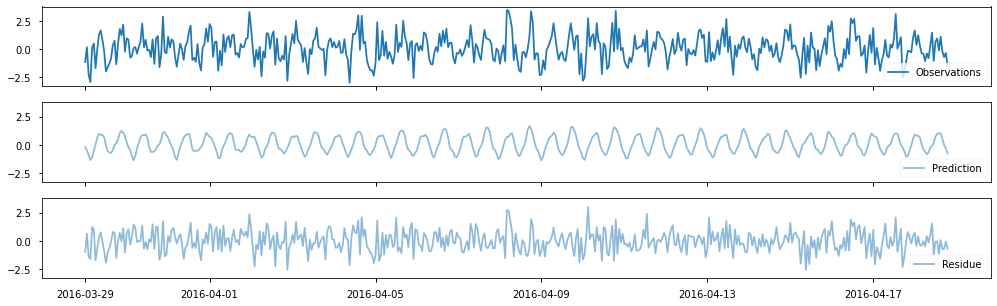

In [ ]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, sharey=True, sharex=True, figsize=(17, 5))

ax0.plot(t, v, label=u'Observations')
ax0.legend(numpoints=1, loc='lower right')

ax1.plot(t, tide['v'], alpha=0.5, label=u'Prediction')
ax1.legend(numpoints=1, loc='lower right')

ax2.plot(t, v-tide['v'], alpha=0.5, label=u'Residue')
_ = ax2.legend(numpoints=1, loc='lower right')

In [ ]:
from rpy2.robjects import r

In [ ]:
%%R
R.version

               _                           
platform       x86_64-pc-linux-gnu         
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          4                           
minor          1.0                         
year           2021                        
month          05                          
day            18                          
svn rev        80317                       
language       R                           
version.string R version 4.1.0 (2021-05-18)
nickname       Camp Pontanezen             


In [ ]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [ ]:
%%R
remotes::install_github("dankelley/oce", ref="develop")

R[write to console]: Skipping install of 'oce' from a github remote, the SHA1 (1f496a4d) has not changed since last install.
  Use `force = TRUE` to force installation



In [ ]:
%%R
if (!require(SWMPr)) install.packages("SWMPr")
if (!require(TideHarmonics)) install.packages("TideHarmonics")

In [ ]:
%%R
library(oce)
library(SWMPr)
library(TideHarmonics)

In [ ]:
%%R
# clean, one hour time step, subset, fill gaps
dat <- qaqc(apadbwq) %>% 
  setstep(timestep = 60) %>% 
  subset(subset = c('2013-01-01 0:0', '2013-12-31 0:0'), select = 'depth') %>% 
  na.approx(maxgap = 1e6)

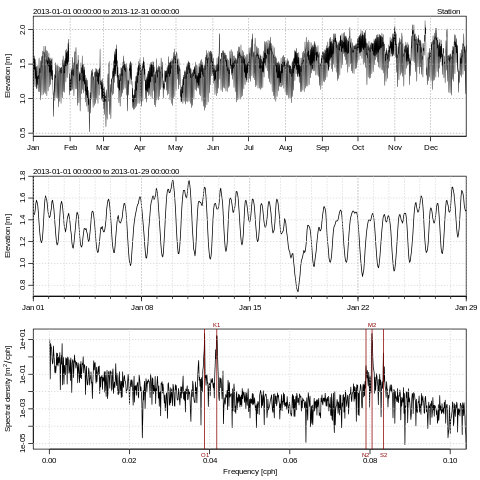

In [ ]:
%%R
datsl <- as.sealevel(elevation = dat$depth, time = dat$datetimestamp)
plot(datsl)

In [ ]:
%%R
# tidal components to estimate
constituents <- c('M2', 'S2', 'N2', 'K2', 'K1', 'O1', 'P1')
 
# loop through tidal components, predict each with tidem
preds <- sapply(constituents, function(x){
   
    mod <- tidem(t = datsl, constituent = x)
    pred <- predict(mod)
    pred - mean(pred)
     
  }) 
 
# combine prediction, sum, add time data
predall <- rowSums(preds) + mean(datsl[['elevation']])
preds <- data.frame(time = datsl[['time']], preds, Estimated = predall) 
 
head(preds)

                 time          M2           S2           N2           K2
1 2013-01-01 00:00:00 -0.11098020 -0.020499867 0.0009915824 -0.004534663
2 2013-01-01 01:00:00 -0.11746242 -0.008651659 0.0072804771 -0.009112819
3 2013-01-01 02:00:00 -0.09451141  0.005515382 0.0118116728 -0.011236000
4 2013-01-01 03:00:00 -0.04787620  0.018205210 0.0134915071 -0.010332254
5 2013-01-01 04:00:00  0.01076148  0.026017595 0.0119145303 -0.006645036
6 2013-01-01 05:00:00  0.06671338  0.026859216 0.0074613661 -0.001167626
             K1         O1            P1 Estimated
1  0.0914568529 0.01428656  0.0385308817  1.467530
2  0.0649643288 0.04077637  0.0344303475  1.470503
3  0.0340197907 0.06485774  0.0279958775  1.496732
4  0.0007435545 0.08511160  0.0196635859  1.537286
5 -0.0325842960 0.10034441  0.0099982174  1.578085
6 -0.0636801407 0.10965853 -0.0003451308  1.603778


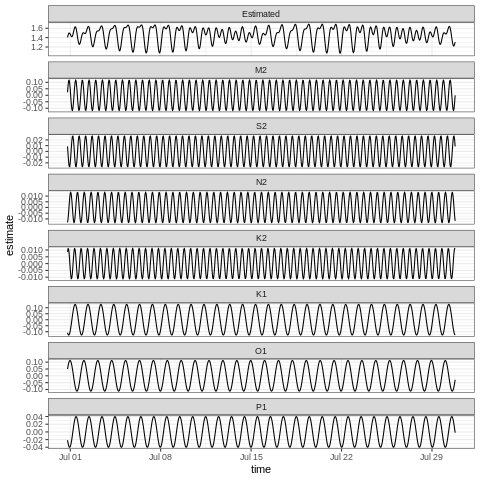

In [ ]:
%%R
# prep for plot
toplo <- preds %>% 
  gather('component', 'estimate', -time) %>% 
  mutate(component = factor(component, level = c('Estimated', constituents)))
 
# plot two weeks
ggplot(toplo, aes(x = time, y = estimate, group = component)) + 
  geom_line() + 
  scale_x_datetime(limits = as.POSIXct(c('2013-07-01', '2013-07-31'))) + 
  facet_wrap(~component, ncol = 1, scales = 'free_y') + 
  theme_bw() 

In [ ]:
%%R
# estimate all components together
mod <- tidem(t = datsl)
 
# get components of interest
amps <- data.frame(mod@data[c('name', 'amplitude')]) %>% 
  filter(name %in% constituents) %>% 
  arrange(amplitude)
amps

Note: the tidal record is too short to fit for constituents:  SA PI1 S1 PSI1 GAM2 H1 H2 T2 R2 
  name  amplitude
1   K2 0.01091190
2   N2 0.01342395
3   S2 0.02904518
4   P1 0.04100388
5   O1 0.11142455
6   M2 0.12005114
7   K1 0.12865764


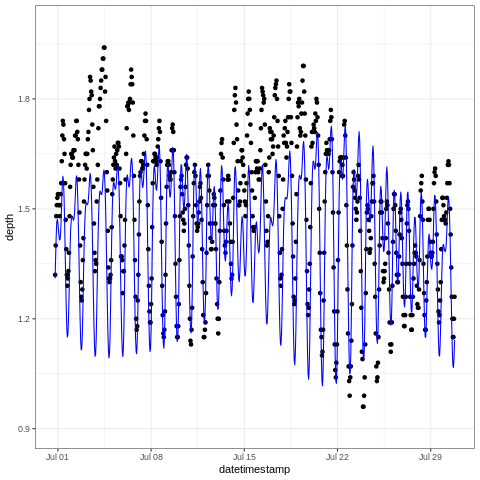

In [ ]:
%%R
# add predictions to observed data
dat$Estimated <- predict(mod)
 
# plot one month
ggplot(dat, aes(x = datetimestamp, y = depth)) + 
  geom_point() + 
  geom_line(aes(y = Estimated), colour = 'blue') + 
  scale_x_datetime(limits = as.POSIXct(c('2013-07-01', '2013-07-31'))) + 
  scale_y_continuous(limits = c(0.9, 2)) +
  theme_bw() 

Note: the tidal record is too short to fit for constituents:  SA PI1 S1 PSI1 GAM2 H1 H2 T2 R2 


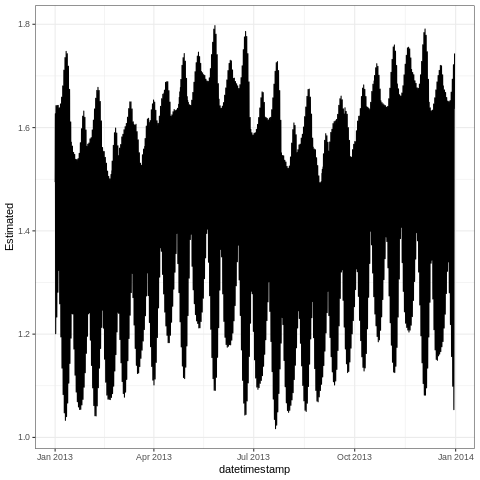

In [ ]:
%%R
# clean input data, one hour time step, subset, fill gaps
dat <- qaqc(apadbwq) %>% 
  setstep(timestep = 60) %>% 
  subset(., subset = c('2013-01-01 0:0', '2013-12-31 0:0'), select = 'depth') %>% 
  na.approx(maxgap = 1e6)
 
# get model
datsl <- as.sealevel(elevation = dat$depth, time = dat$datetimestamp)
mod <- tidem(t = datsl)
 
# add predictions to observed data
dat$Estimated <- predict(mod)
 
# plot
ggplot(dat, aes(x = datetimestamp, y = Estimated)) + 
  geom_line() +
  theme_bw() 


# 5. Analysis and report